In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Make sure you have seaborn installed

In [9]:
# Replace 'your_file.csv' with the actual file path
csv_file = 'result_data.csv'

# Read the CSV file and create a DataFrame
df = pd.read_csv(csv_file)
df

,data_group,event_type,finish_time,NCV,NCA,relative_NCV,relative_NCA,stroke_speed,velocity_mean,velocity_median,...,jerk_y_mean,jerk_y_median,jerk_y_std_dev,jerk_y_minimum,jerk_y_maximum,jerk_y_data_range,jerk_y_iqr,jerk_y_skewness,jerk_y_kurtosis,has_parkinson
0,1,1,5.180044,60,69,11.582914,13.320351,316.968468,660.142357,412.307076,...,8.845555e+06,5.999848e+06,9.439072e+06,0.0,4.399888e+07,4.399888e+07,8.999772e+06,1.731869,2.702888,0
1,1,3,4.820075,51,60,10.580749,12.447940,210.631907,410.338698,309.952007,...,5.652515e+06,3.999814e+06,5.783232e+06,0.0,2.599879e+07,2.599879e+07,4.999768e+06,1.600076,2.043617,0
2,1,2,5.280308,35,45,6.628401,8.522230,169.507549,854.468062,299.982495,...,9.134764e+06,2.999475e+06,1.894469e+07,0.0,1.079811e+08,1.079811e+08,6.998775e+06,3.764628,14.989523,0
3,1,4,13.329880,82,95,6.151593,7.126846,237.269540,1358.159235,467.080201,...,1.522394e+07,5.000134e+06,4.763614e+07,0.0,5.100137e+08,5.100137e+08,1.100030e+07,8.073941,72.894062,0
4,1,2,5.740754,51,62,8.883851,10.799975,302.362223,757.159329,355.861061,...,9.208236e+06,2.998818e+06,1.916554e+07,0.0,1.329476e+08,1.329476e+08,6.997243e+06,4.303925,20.551684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,3,1,3.216239,40,45,12.436886,13.991496,158.903875,251.517077,139.388167,...,2.543770e+06,1.914973e+06,2.522729e+06,0.0,1.436230e+07,1.436230e+07,2.393717e+06,2.029246,5.914386,1
2676,3,4,3.920909,37,37,9.436588,9.436588,142.669144,226.949059,200.282213,...,2.481033e+06,1.998610e+06,2.385385e+06,0.0,7.994440e+06,7.994440e+06,2.997915e+06,0.896013,-0.131416,1
2677,3,1,3.630221,33,45,9.090357,12.395941,124.270746,274.115650,191.177357,...,3.499362e+06,1.999635e+06,4.158569e+06,0.0,1.899654e+07,1.899654e+07,3.249408e+06,1.931379,3.599911,1
2678,3,3,3.777979,37,42,9.793597,11.117056,104.651341,325.259612,176.803098,...,3.557078e+06,1.987355e+06,4.301190e+06,0.0,2.384826e+07,2.384826e+07,2.981033e+06,2.686592,8.120157,1


## Adaboost

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Define your target variable (replace 'target_column' with your actual target column)
target_column = 'has_parkinson'
y = df[target_column]

# Drop the target column and other non-essential columns if needed
# Columns that don't affect the target variable should be removed
X = df.drop(columns=[target_column, 'data_group', 'event_type'])

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier with a DecisionTree base estimator
n_estimators = 100  # You can adjust this number
base_estimator = DecisionTreeClassifier(max_depth=2)  # You can adjust the depth
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)

# Fit the AdaBoostClassifier to the training data
adaboost.fit(X_train, y_train)

# Get feature importances from the AdaBoost model
feature_importances = adaboost.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Column': X.columns, 'Feature Importance': feature_importances})
importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)

# Display the top N most important columns
top_n = 10  # Change this to the number of top features you want to display
top_features = importance_df.head(top_n)
print(top_features)


d:\AppRelated\Anaconda\envs\mi\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


                   Column  Feature Importance
0             finish_time            0.059830
5            stroke_speed            0.044895
33        velocity_x_mean            0.042381
61      velocity_y_median            0.034534
3            relative_NCV            0.029940
12           velocity_iqr            0.029069
70  acceleration_y_median            0.026753
53         jerk_x_std_dev            0.026649
57             jerk_x_iqr            0.026544
66         velocity_y_iqr            0.026221


In [18]:
# Use the trained AdaBoost classifier to make predictions on the test data
y_pred = adaboost.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = adaboost.score(X_test, y_test)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 68.28%


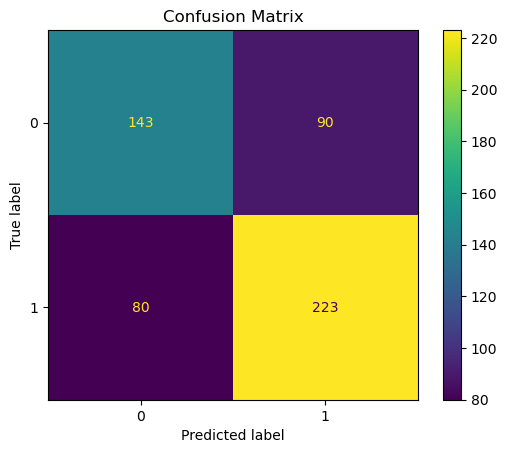

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion, display_labels=adaboost.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


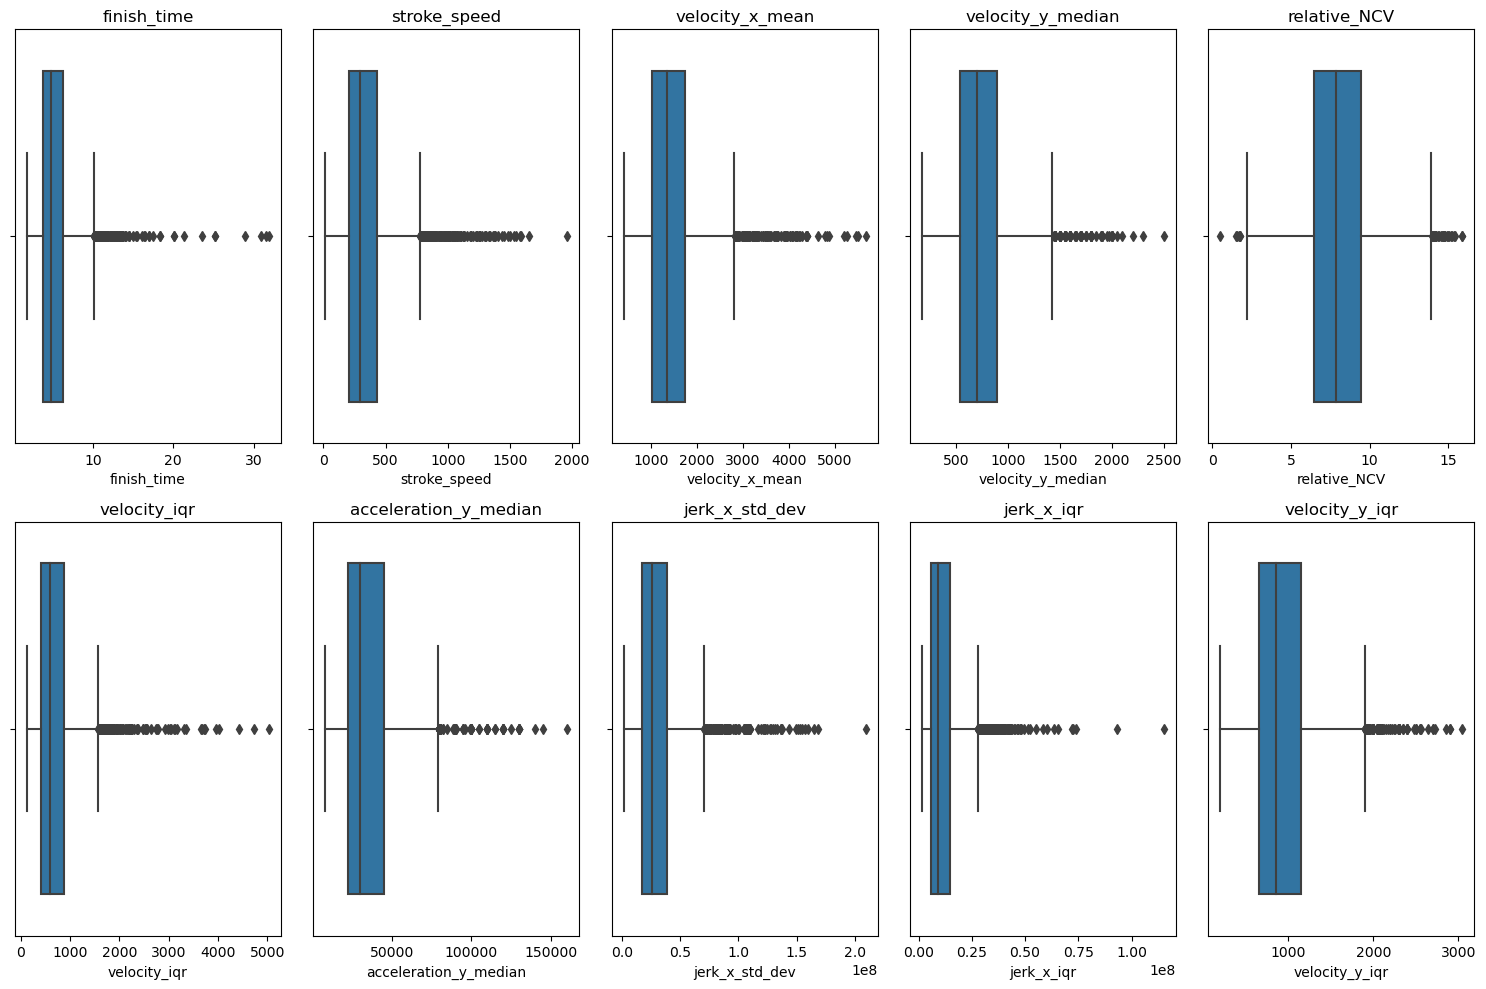

In [23]:
# Define the number of top features you want to display
top_n = 10  # Change this to the number of top features you want to visualize

# Get the top N most important features
top_features = importance_df['Column'].head(top_n)

# Create larger boxplots for the top N most important columns
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Iterate through the top features and create boxplots
for i, column_name in enumerate(top_features):
    plt.subplot(2, 5, i + 1)  # Create subplots in a 2x5 grid
    sns.boxplot(data=df, x=column_name)
    plt.title(column_name)

plt.tight_layout()  # Ensure proper layout
plt.show()

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the GradientBoostingClassifier to the training data
gradient_boosting.fit(X_train, y_train)

# Get feature importances from the AdaBoost model
gb_feature_importances = gradient_boosting.feature_importances_

# Create a DataFrame to display feature importances
gb_importance_df = pd.DataFrame({'Column': X.columns, 'Feature Importance': gb_feature_importances})
gb_importance_df = gb_importance_df.sort_values(by='Feature Importance', ascending=False)

# Display the top N most important columns
top_n = 10  # Change this to the number of top features you want to display
top_features = gb_importance_df.head(top_n)
print(top_features)


                    Column  Feature Importance
5             stroke_speed            0.156245
0              finish_time            0.088709
4             relative_NCA            0.048490
24               jerk_mean            0.037011
70   acceleration_y_median            0.035366
1                      NCV            0.034767
44  acceleration_x_std_dev            0.031621
80          jerk_y_std_dev            0.028915
12            velocity_iqr            0.027149
61       velocity_y_median            0.026776


In [26]:
# Use the trained Gradient Boosting classifier to make predictions on the test data
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate the accuracy of the Gradient Boosting classifier
accuracy_gb = gradient_boosting.score(X_test, y_test)

print("Accuracy (Gradient Boosting): {:.2f}%".format(accuracy_gb * 100))

Accuracy (Gradient Boosting): 68.28%


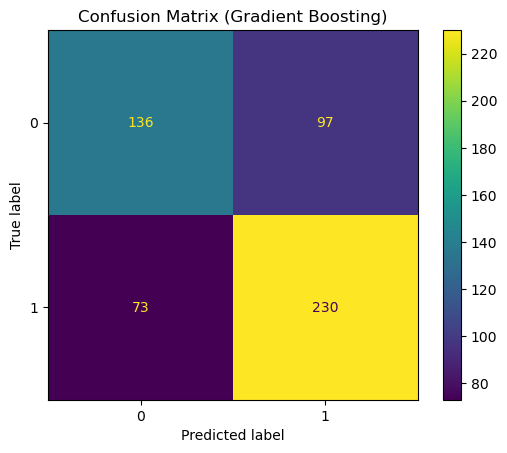

In [27]:
# Create a confusion matrix
confusion_gb = confusion_matrix(y_test, y_pred_gb)

# Plot the confusion matrix
disp_gb = ConfusionMatrixDisplay(confusion_gb, display_labels=gradient_boosting.classes_)
disp_gb.plot(cmap='viridis')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\AppRelated\Anaconda\envs\mi\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


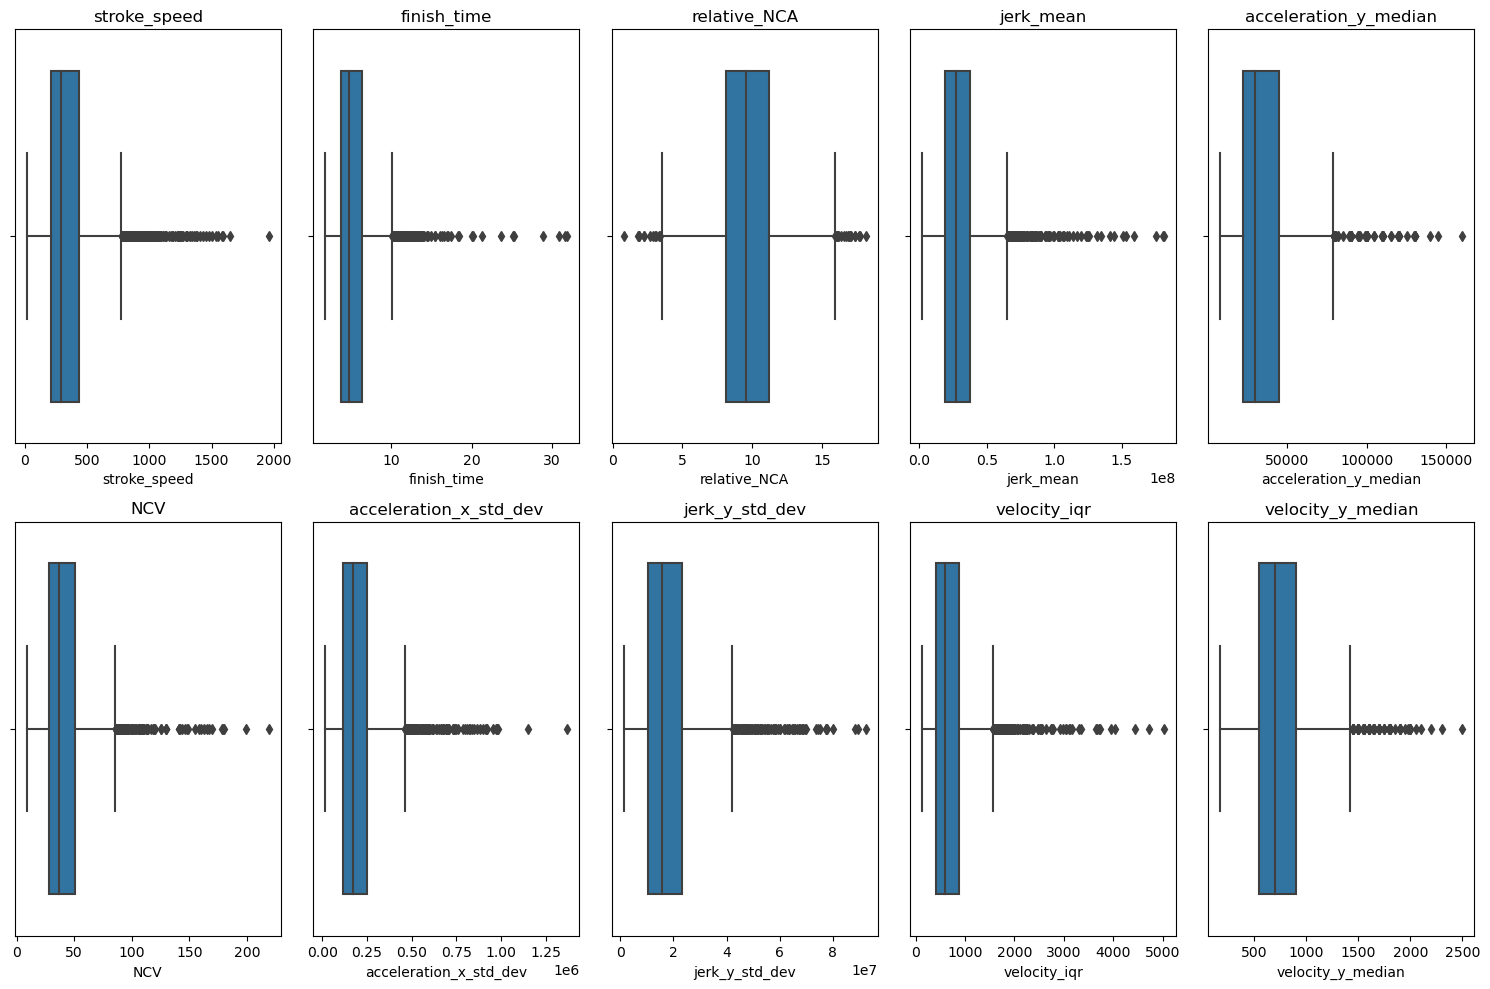

In [28]:
# Define the number of top features you want to display
top_n = 10  # Change this to the number of top features you want to visualize

# Get the top N most important features
top_features = gb_importance_df['Column'].head(top_n)

# Create larger boxplots for the top N most important columns
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Iterate through the top features and create boxplots
for i, column_name in enumerate(top_features):
    plt.subplot(2, 5, i + 1)  # Create subplots in a 2x5 grid
    sns.boxplot(data=df, x=column_name)
    plt.title(column_name)

plt.tight_layout()  # Ensure proper layout
plt.show()